In [ ]:
!pip install pycoingecko
!pip install plotly
!pip install mplfinance
!pip install --upgrade nbformat

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.offline import plot
import matplotlib.pyplot as plt
import datetime
from pycoingecko import CoinGeckoAPI
from mplfinance.original_flavor import candlestick2_ohlc

In [ ]:
dict_={'a':[11,21,31],'b':[12,22,32]}

In [ ]:
df=pd.DataFrame(dict_)
print(df)
type(df)

    a   b
0  11  12
1  21  22
2  31  32


pandas.core.frame.DataFrame

In [ ]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


In [ ]:
df.mean()

a    21.0
b    22.0
dtype: float64

In [ ]:
cg = CoinGeckoAPI()

bitcoin_data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=30)

In [ ]:
type(bitcoin_data )

dict

In [ ]:
bitcoin_price_data = bitcoin_data['prices']

bitcoin_price_data[0:5]

[[1669971706978, 16981.45239770451],
 [1669975232308, 16993.80115471984],
 [1669978916944, 17022.025662866505],
 [1669982402689, 17017.112935036814],
 [1669986006331, 17033.747473205276]]

In [ ]:
data = pd.DataFrame(bitcoin_price_data, columns=['TimeStamp', 'Price'])

Now that we have the DataFrame we will convert the timestamp to datetime and save it as a column called Date. We will map our unix_to_datetime to each timestamp and convert it to a readable datetime.




In [ ]:
data['date'] = data['TimeStamp'].apply(lambda d: datetime.date.fromtimestamp(d/1000.0))

Using this modified dataset we can now group by the <code>Date</code> and find the min, max, open, and close for the candlesticks.

In [ ]:
candlestick_data = data.groupby(data.date, as_index=False).agg({"Price": ['min', 'max', 'first', 'last']})

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=candlestick_data['date'],
                open=candlestick_data['Price']['first'], 
                high=candlestick_data['Price']['max'],
                low=candlestick_data['Price']['min'], 
                close=candlestick_data['Price']['last'])
                ])

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

 <h2 id="RP">Requests in Python</h2>

In [ ]:
import requests

In [ ]:
import os 
from PIL import Image
from IPython.display import IFrame

In [ ]:
url='https://www.ibm.com/'
r=requests.get(url)

In [ ]:
r.status_code

200

In [ ]:
print(r.request.headers)

{'User-Agent': 'python-requests/2.23.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Cookie': '_abck=24D5A9DFC7BE90656C6E0C1958AD6495~-1~YAAQSGgBF1xkyhGFAQAAkvC6bAlZWmUEH27SmFlF7HRugYJlxhha7ke/F3IVx0xlHWsI8l69W/x825mRf23jP6A5uq4UBNidfqY9XOuY0LfJSK03LAqVuDdTmY9VRkuHDbtnQ7WxpKzimBnmiWlWUPqe/NWUk0MlHpqjgbT7UZBdJbaqxA/QIarvtquGJR66zMLsrr91FN9/+orfKFG2/wjDv08Ihh1co3PH6WueUhmWL7SVodk+Zs3TxTmQhDlHGK0hmboiiExQpFUPlBVVYFj9a+2w076h8hwfiDvd0j/aYj79HU5JKgV1v1WQNYOScsXhbVP86AsIlE7YZqSZxBO0IsuaQjSOPzeffpQpL5vwKWHwqHc=~-1~-1~-1; bm_sz=F6606506ECF63B6C3C250437A00FF847~YAAQSGgBF11kyhGFAQAAkvC6bBKE0zrOWPI7BfNwAORp3/mouteXBkE51NPlQp5yLjKbtIZlEPHE/rjaI3bMMDpR8ORjf4fWz7XBVLrIkGYMrpMqK2sON0NBkXARuyHJdBuRX57olAAJlGPxh/aWQgUB5n1/fF7XnUgoWZfxwIejjiLSkTFYcGr0VWrucpHAaHr+2/5x86BuSedaM/yO0p9yrIapZ9wauBZils6KU4eDC4h3siP4RUb9XU3FEdofsLujDYRKnTLP7P4PGAdM05M32/67AnGHV0dqTDnXE/A=~3162928~3356980'}


In [ ]:
print("request body:", r.request.body)

request body: None


In [ ]:
header=r.headers
print(r.headers)

{'Server': 'Apache', 'Last-Modified': 'Tue, 20 Dec 2022 21:02:25 GMT', 'ETag': '"125ee-5f048c0b7dc8b-gzip"', 'Accept-Ranges': 'bytes', 'Content-Type': 'text/html', 'Cache-Control': 'max-age=3600', 'Expires': 'Sun, 01 Jan 2023 10:47:48 GMT', 'X-Akamai-Transformed': '9 16328 0 pmb=mTOE,2', 'Content-Encoding': 'gzip', 'Date': 'Sun, 01 Jan 2023 09:47:48 GMT', 'Content-Length': '16502', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'x-content-type-options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'Content-Security-Policy': 'upgrade-insecure-requests', 'Strict-Transport-Security': 'max-age=31536000'}


In [ ]:
header['date']

'Sun, 01 Jan 2023 09:47:48 GMT'

In [ ]:
header['Content-Type']

'text/html'

In [ ]:
 r.encoding

'ISO-8859-1'

In [ ]:
r.text[0:100]

'<!DOCTYPE html><html lang="en-US"><head><meta name="viewport" content="width=device-width"/><meta ch'

You can load other types of data for non-text requests, like images. Consider the URL of the following image:


In [ ]:
# Use single quotation marks for defining string
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/IDSNlogo.png'

In [ ]:
r=requests.get(url)

In [ ]:
print(r.headers)

{'Date': 'Sun, 01 Jan 2023 09:51:26 GMT', 'X-Clv-Request-Id': '9ac67e98-3bca-48ed-adfe-f2cea6e8b5e1', 'Server': 'Cleversafe', 'X-Clv-S3-Version': '2.5', 'Accept-Ranges': 'bytes', 'x-amz-request-id': '9ac67e98-3bca-48ed-adfe-f2cea6e8b5e1', 'ETag': '"8bb44578fff8fdcc3d2972be9ece0164"', 'Content-Type': 'image/png', 'Last-Modified': 'Wed, 16 Nov 2022 03:32:41 GMT', 'Content-Length': '78776'}


In [ ]:
r.headers['Content-Type']

'image/png'

An image is a response object that contains the image as a <a href="https://docs.python.org/3/glossary.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork1005-2022-01-01#term-bytes-like-object">bytes-like object</a>. As a result, we must save it using a file object. First, we specify the file path and
name 


In [ ]:
path=os.path.join(os.getcwd(),'image.png')
path

'/content/image.png'

We save the file, in order to access the body of the response we use the attribute <code>content</code> then save it using the <code>open</code> function and write <code>method</code>: 


In [ ]:
with open(path,'wb') as f:
    f.write(r.content)

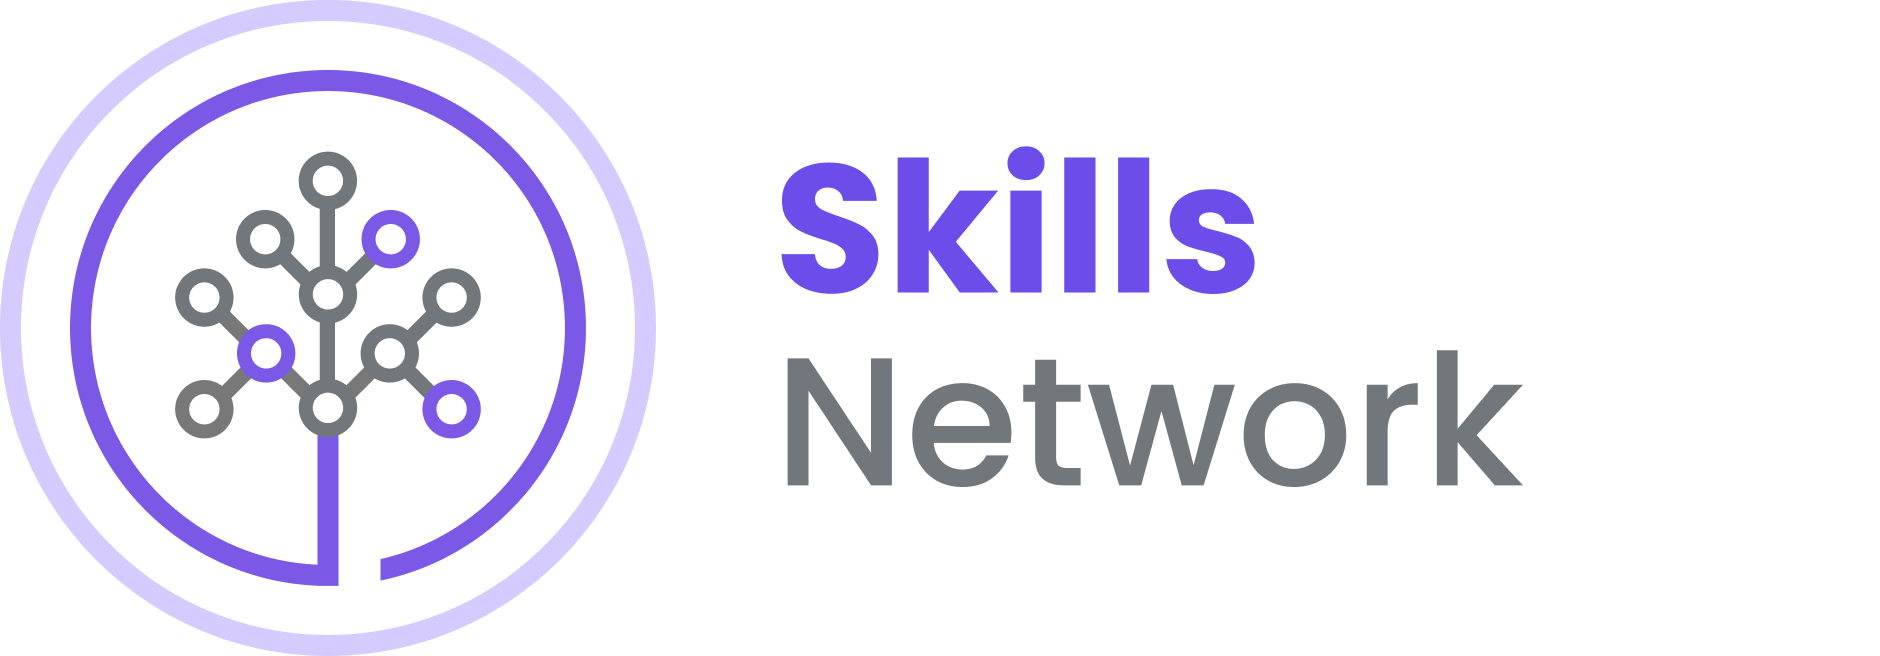

In [ ]:
Image.open(path)  

<h1> Questions </h1>

<h3>Question 1: write <a href="https://www.gnu.org/software/wget/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork1005-2022-01-01"><code> wget </code></a></h3>


In the previous section, we used the wget function to retrieve content from the web server as shown below. Write the python code to perform the same task. The code should be the same as the one used to download the image, but the file name should be 'Example1.txt'.

!wget -O /resources/data/Example1.txt https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/Example1.txt

wb -> write and binary. Since you are writing a .jpg file
rb ->  read  jpg file 

<span> On Windows, 'b' appended to the mode opens the file in binary mode, so there are also modes like 'rb', 'wb', and 'r+b'. Python on Windows makes a distinction between text and binary files; the end-of-line characters in text files are automatically altered slightly when data is read or written. This behind-the-scenes modification to file data is fine for ASCII text files, but it’ll corrupt binary data like that in JPEG or EXE files. </span>

<details><summary>Click here for the solution</summary>

```python
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/Example1.txt'
path=os.path.join(os.getcwd(),'example1.txt')
r=requests.get(url)
with open(path,'wb') as f:
    f.write(r.content)

```

</details>


In [ ]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/Example1.txt'

path = os.path.join(os.getcwd() , 'example1.txt')

r=requests.get(url)
with open(path,'wb') as f:
    print(r.content)
    f.write(r.content)



b'This is line 1 \nThis is line 2\nThis is line 3'


<h2 id="URL_P">Get Request with URL Parameters </h2>


In [ ]:
url_get='http://httpbin.org/get'

In [ ]:
#To create a Query string, add a dictionary. The keys are the parameter names and the values are the value of the Query string.

payload={"name":"Joseph","ID":"123"}

Then passing the dictionary <code>payload</code> to the <code>params</code> parameter of the <code> get()</code> function:


In [ ]:
r=requests.get(url_get,params=payload)

In [ ]:
r.url

'http://httpbin.org/get?name=Joseph&ID=123'

In [ ]:
print("request body:", r.request.body)

request body: None


In [ ]:
print(r.status_code)

200


In [ ]:
print(r.text)

{
  "args": {
    "ID": "123", 
    "name": "Joseph"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.23.0", 
    "X-Amzn-Trace-Id": "Root=1-63b15e7c-6b1b18dd2536a36c12646e89"
  }, 
  "origin": "34.74.67.161", 
  "url": "http://httpbin.org/get?name=Joseph&ID=123"
}



In [ ]:
r.headers['Content-Type']

'application/json'

In [ ]:
r.json()

{'args': {'ID': '123', 'name': 'Joseph'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.23.0',
  'X-Amzn-Trace-Id': 'Root=1-63b15e7c-6b1b18dd2536a36c12646e89'},
 'origin': '34.74.67.161',
 'url': 'http://httpbin.org/get?name=Joseph&ID=123'}

In [ ]:
r.json()['args']

{'ID': '123', 'name': 'Joseph'}

In [ ]:
url_post='http://httpbin.org/post'

This endpoint will expect data as a file or as a form. A form is convenient way to configure an HTTP request to send data to a server.

To make a <code>POST</code> request we use the <code>post()</code> function, the variable <code>payload</code> is passed to the parameter <code> data </code>:


In [ ]:
r_post=requests.post(url_post,data=payload)

Comparing the URL from the response object of the <code>GET</code> and <code>POST</code> request we see the <code>POST</code> request has no name or value pairs.


In [ ]:
print("POST request URL:",r_post.url )
print("GET request URL:",r.url)

POST request URL: http://httpbin.org/post
GET request URL: http://httpbin.org/get?name=Joseph&ID=123


We can compare the <code>POST</code> and <code>GET</code> request body, we see only the <code>POST</code> request has a body:


In [ ]:
print("POST request body:",r_post.request.body)
print("GET request body:",r.request.body)

POST request body: name=Joseph&ID=123
GET request body: None


In [ ]:
r_post.json()['form']

{'ID': '123', 'name': 'Joseph'}

<h2>  Hands-On Lab: API Examples </h2>

<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="cognitiveclass.ai logo">
</center>

# Simple APIs 
## Random User and Fruitvice API Examples


Estimated time needed: **25** minutes

## Objectives

After completing this lab you will be able to:

*   Load and use RandomUser API, using `RandomUser()` Python library
*   Load and use Fruitvice API, using `requests` Python library



## Example 1: RandomUser API
Bellow are Get Methods parameters that we can generate. For more information on the parameters, please visit this [documentation](https://randomuser.me/documentation?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork1005-2022-01-01) page.


## **Get Methods**

- get_cell()
- get_city()
- get_dob()
- get_email()
- get_first_name()
- get_full_name()
- get_gender()
- get_id()
- get_id_number()
- get_id_type()
- get_info()
- get_last_name()
- get_login_md5()
- get_login_salt()
- get_login_sha1()
- get_login_sha256()
- get_nat()
- get_password()
- get_phone()
- get_picture()
- get_postcode()
- get_registered()
- get_state()
- get_street()
- get_username()
- get_zipcode()



---

To start using the API you can install the `randomuser` library running the `pip install` command.


In [ ]:
!pip install randomuser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for randomuser: filename=randomuser-1.6-py3-none-any.whl size=5083 sha256=2b277fb94b7cee4638ec81c991536b0f4b198c2f294da1918b7045f8df62298c
  Stored in directory: /root/.cache/pip/wheels/17/a5/f9/554200008d8fc0d9ad077722bf27cde01be06cebedadc24600
Successfully built randomuser


In [ ]:
from randomuser import RandomUser
import pandas as pd

In [ ]:
r = RandomUser()

In [ ]:
some_list = r.generate_users(10)
some_list

In [ ]:
name = r.get_full_name()

In [ ]:
for user in some_list:
    print (user.get_full_name()," ",user.get_email())

Natan Omland   natan.omland@example.com
Chloe Steward   chloe.steward@example.com
Elliot Colin   elliot.colin@example.com
Matias Kyllonen   matias.kyllonen@example.com
Alberte Mortensen   alberte.mortensen@example.com
Hans-Ulrich Faure   hans-ulrich.faure@example.com
Snorre Martens   snorre.martens@example.com
Linnea Korpi   linnea.korpi@example.com
Juho Kivela   juho.kivela@example.com
Lone Verkerk   lone.verkerk@example.com


## Exercise 1
In this Exercise, generate photos of the random 5 users.

In [ ]:
some_list = r.generate_users(5)

for user in some_list:
    print (user.get_picture())

https://randomuser.me/api/portraits/women/83.jpg
https://randomuser.me/api/portraits/men/14.jpg
https://randomuser.me/api/portraits/women/49.jpg
https://randomuser.me/api/portraits/men/25.jpg
https://randomuser.me/api/portraits/women/16.jpg


<h4> To generate a table with information about the users, we can write a function containing all desirable parameters. For example, name, gender, city, etc. The parameters will depend on the requirements of the test to be performed. We call the Get Methods, listed at the beginning of this notebook. Then, we return pandas dataframe with the users. </h4>


In [ ]:
def get_users():
    users =[]
     
    for user in RandomUser.generate_users(10):
        users.append({"Name":user.get_full_name(),
                      "Gender":user.get_gender(),
                      "City":user.get_city(),
                      "State":user.get_state(),
                      "Email":user.get_email(), 
                      "DOB":user.get_dob(),
                      "Picture":user.get_picture()})
      
    return pd.DataFrame(users)    

get_users()

,Name,Gender,City,State,Email,DOB,Picture
0,Clara Serrano,female,Jerez de la Frontera,Asturias,clara.serrano@example.com,1966-10-11T05:44:20.004Z,https://randomuser.me/api/portraits/women/35.jpg
1,Lloyd Jordan,male,Albany,Western Australia,lloyd.jordan@example.com,1970-03-01T07:48:39.488Z,https://randomuser.me/api/portraits/men/93.jpg
2,Andrea Ruiz,female,Glasgow,Borders,andrea.ruiz@example.com,1992-07-08T00:12:40.445Z,https://randomuser.me/api/portraits/women/60.jpg
3,Rosalyn Weaver,female,Canterbury,Isle of Wight,rosalyn.weaver@example.com,1972-02-12T07:41:42.156Z,https://randomuser.me/api/portraits/women/58.jpg
4,Viivi Leppanen,female,Oripää,Northern Savonia,viivi.leppanen@example.com,1993-02-06T14:09:25.624Z,https://randomuser.me/api/portraits/women/16.jpg
5,Zackary Patel,male,Lumsden,Saskatchewan,zackary.patel@example.com,1972-11-11T14:55:57.774Z,https://randomuser.me/api/portraits/men/47.jpg
6,Çetin Kunter,male,Ardahan,Aksaray,cetin.kunter@example.com,1989-11-19T23:56:57.359Z,https://randomuser.me/api/portraits/men/95.jpg
7,Alice Turner,female,Porirua,Otago,alice.turner@example.com,1969-07-08T03:16:27.120Z,https://randomuser.me/api/portraits/women/96.jpg
8,Stefan Lilleby,male,Leland,Hedmark,stefan.lilleby@example.com,1971-03-09T08:04:51.421Z,https://randomuser.me/api/portraits/men/87.jpg
9,Nazia Van Andel,female,Hazerswoude-Rijndijk,Friesland,nazia.vanandel@example.com,1971-03-14T23:56:56.999Z,https://randomuser.me/api/portraits/women/36.jpg


In [ ]:
df1 = pd.DataFrame(get_users())

df1

,Name,Gender,City,State,Email,DOB,Picture
0,Justin Kelley,male,Miami Gardens,Oregon,justin.kelley@example.com,1963-03-28T10:19:11.533Z,https://randomuser.me/api/portraits/men/47.jpg
1,Stella Li,female,Upper Hutt,Gisborne,stella.li@example.com,1953-08-01T10:27:07.799Z,https://randomuser.me/api/portraits/women/41.jpg
2,Ethan Fields,male,Tramore,Offaly,ethan.fields@example.com,1946-11-23T21:35:51.856Z,https://randomuser.me/api/portraits/men/64.jpg
3,Otília Ferreira,female,Montes Claros,Roraima,otilia.ferreira@example.com,1948-09-09T05:55:42.814Z,https://randomuser.me/api/portraits/women/66.jpg
4,Ilona Ramo,female,Lumparland,Satakunta,ilona.ramo@example.com,1977-07-28T02:05:33.562Z,https://randomuser.me/api/portraits/women/35.jpg
5,Sonia Soto,female,Zaragoza,Ceuta,sonia.soto@example.com,1950-12-20T04:05:08.153Z,https://randomuser.me/api/portraits/women/26.jpg
6,Josefine Christiansen,female,Frederiksberg,Sjælland,josefine.christiansen@example.com,1997-10-16T16:18:03.726Z,https://randomuser.me/api/portraits/women/59.jpg
7,آرمیتا کوتی,female,ملارد,هرمزگان,armyt.khwty@example.com,1954-10-19T15:02:02.589Z,https://randomuser.me/api/portraits/women/72.jpg
8,Leo Roy,male,Chesterville,Nova Scotia,leo.roy@example.com,1981-05-08T11:54:39.683Z,https://randomuser.me/api/portraits/men/47.jpg
9,Ebba Klopper,female,Kraggenburg,Friesland,ebba.klopper@example.com,1945-11-30T01:56:08.733Z,https://randomuser.me/api/portraits/women/74.jpg


## Example 2: Fruitvice API

Another, more common way to use APIs, is through `requests` library. The next lab, Requests and HTTP, will contain more information about requests.

We will start by importing all required libraries.


In [ ]:
import requests
import json

In [ ]:
data = requests.get("https://www.fruityvice.com/api/fruit/all")

In [ ]:
results = json.loads(data.text)

In [ ]:
pd.DataFrame(results)

,genus,name,id,family,order,nutritions
0,Malus,Apple,6,Rosaceae,Rosales,"{'carbohydrates': 11.4, 'protein': 0.3, 'fat':..."
1,Prunus,Apricot,35,Rosaceae,Rosales,"{'carbohydrates': 3.9, 'protein': 0.5, 'fat': ..."
2,Persea,Avocado,84,Lauraceae,Laurales,"{'carbohydrates': 8.53, 'protein': 2, 'fat': 1..."
3,Musa,Banana,1,Musaceae,Zingiberales,"{'carbohydrates': 22, 'protein': 1, 'fat': 0.2..."
4,Rubus,Blackberry,64,Rosaceae,Rosales,"{'carbohydrates': 9, 'protein': 1.3, 'fat': 0...."
5,Fragaria,Blueberry,33,Rosaceae,Rosales,"{'carbohydrates': 5.5, 'protein': 0, 'fat': 0...."
6,Prunus,Cherry,9,Rosaceae,Rosales,"{'carbohydrates': 12, 'protein': 1, 'fat': 0.3..."
7,Theobroma,Chocolate,88,Malvaceae,Malvales,"{'carbohydrates': 58, 'protein': 8.51, 'fat': ..."
8,Vaccinium,Cranberry,87,Ericaceae,Ericales,"{'carbohydrates': 12.2, 'protein': 0.4, 'fat':..."
9,Selenicereus,Dragonfruit,80,Cactaceae,Caryophyllales,"{'carbohydrates': 9, 'protein': 9, 'fat': 1.5,..."


In [ ]:
df2 = pd.json_normalize(results)

df2

,genus,name,id,family,order,nutritions.carbohydrates,nutritions.protein,nutritions.fat,nutritions.calories,nutritions.sugar
0,Malus,Apple,6,Rosaceae,Rosales,11.40,0.30,0.40,52,10.30
1,Prunus,Apricot,35,Rosaceae,Rosales,3.90,0.50,0.10,15,3.20
2,Persea,Avocado,84,Lauraceae,Laurales,8.53,2.00,14.66,160,0.66
3,Musa,Banana,1,Musaceae,Zingiberales,22.00,1.00,0.20,96,17.20
4,Rubus,Blackberry,64,Rosaceae,Rosales,9.00,1.30,0.40,40,4.50
5,Fragaria,Blueberry,33,Rosaceae,Rosales,5.50,0.00,0.40,29,5.40
6,Prunus,Cherry,9,Rosaceae,Rosales,12.00,1.00,0.30,50,8.00
7,Theobroma,Chocolate,88,Malvaceae,Malvales,58.00,8.51,30.57,531,54.00
8,Vaccinium,Cranberry,87,Ericaceae,Ericales,12.20,0.40,0.10,46,4.00
9,Selenicereus,Dragonfruit,80,Cactaceae,Caryophyllales,9.00,9.00,1.50,60,8.00


In [ ]:
cherry = df2.loc[df2["name"] == 'Cherry']
(cherry.iloc[0]['family']) , (cherry.iloc[0]['genus'])

('Rosaceae', 'Prunus')

## Exercise 2
In this Exercise, find out how many calories are contained in a banana.


In [ ]:
cal_banana = df2.loc[df2["name"] == 'Banana']
cal_banana.iloc[0]['nutritions.calories']

96

## Exercise 3

This [page](https://github.com/public-apis/public-apis#animals) contains a list of free public APIs. Choose any API of your interest and use it to load/extract some information, as shown in the example above.
1. Using `requests.get("url")` function, load your data.


In [ ]:
data2 = requests.get("https://www.fishwatch.gov/api/species")
results2 = json.loads(data2.text)
df3 = pd.DataFrame(results2)
df3

,Fishery Management,Habitat,Habitat Impacts,Image Gallery,Location,Management,NOAA Fisheries Region,Population,Population Status,Scientific Name,...,Selenium,Serving Weight,Servings,Sodium,Source,"Sugars, Total",Taste,Texture,Path,last_update
0,"<ul>\n<li><a href=""https://www.fisheries.noaa....",None,"Bottomfish fishing operations, typically using...",[{'src': 'https://origin-east-01-drupal-fishwa...,<ul>\n<li>Crimson jobfish are distributed thro...,None,Pacific Islands,"The population level is unknown, but the stock...",<ul>\n<li>There are five stocks of crimson job...,Pristipomoides filamentosus,...,38.2 mcg,100 g (raw),1,64 mg,<p>U.S -wild caught around Hawaii and Pacific ...,0 g,<p>Crimson jobfish has a delicate flavor.</p>\n,<p>Crimson jobfish has&nbsp;a firm texture and...,/profiles/crimson-jobfish,06/21/2022 - 12:00
1,"<ul>\n<li><a href=""https://www.fisheries.noaa....","<ul>\n<li>White hake are groundfish, meaning t...",Area closures and gear restrictions protect ha...,[{'src': 'https://origin-east-01-drupal-fishwa...,<ul>\n<li>White hake are found in the northwes...,None,Greater Atlantic,Significantly below target population level. A...,<ul>\n<li>According to the 2019 stock assessme...,Urophycis tenuis,...,32.1 mcg,100 g (raw),1,72 mg,<p>White hake is wild-caught from Maine to sou...,0 g,"<p>White hake has a mild, almost sweet&nbsp;ta...","<p>White hake has a soft, delicate texture tha...",/profiles/white-hake,10/05/2022 - 16:06
2,"<ul>\n<li>\n<p><a href=""https://archive.fisher...",<ul>\n<li>Atlantic chub mackerel are a schooli...,Area closures and gear restrictions protect ha...,[{'src': 'https://origin-east-01-drupal-fishwa...,<ul>\n<li>Atlantic chub mackerel in the wester...,None,Greater Atlantic,The stock has never been assessed. The popula...,<p>Atlantic chub mackerel has never been asses...,Scomber colias,...,44.1 mcg,100 g (raw),1,90 mg,<p>U.S. wild caught from Southern New England ...,0 g,"<p>Rich, pronounced flavor.</p>\n","<p>Soft, flaky, and moist.</p>\n",/profiles/atlantic-chub-mackerel,08/11/2022 - 16:16
3,"<ul>\n<li><a href=""https://www.fisheries.noaa....",<ul>\n<li>Shortfin squid live in deep and shal...,Fishing gears used to harvest shortfin squid h...,None,<ul>\n<li>Shortfin squid inhabits the continen...,None,Greater Atlantic,The population level is unknown. The species h...,<ul>\n<li>According to the latest assessment (...,Illex illecebrosus,...,44.8 mcg,100 g,1,44 mg,<p>U.S. wild-caught from Maine to North Caroli...,0 g,"<p>Mild, and subtly sweet.</p>\n<p>&nbsp;</p>\n",<p>Firm and meaty.</p>\n,/profiles/shortfin-squid,09/02/2022 - 11:08
4,"<ul>\n<li>The states and <a href=""https://www....",<ul>\n<li>American lobsters live on the ocean ...,Fishing gears used to harvest American lobster...,[{'src': 'https://origin-east-01-drupal-fishwa...,<ul>\n<li>American lobsters are found in the n...,None,Greater Atlantic,Above target population levels in the Gulf of ...,"<ul>\n<li>According to the 2020&nbsp;<a href=""...",Homarus americanus,...,41.4 mcg,100 g (raw),1,296 mg,<p>U.S. wild-caught from Maine to North Caroli...,0 g,<p>Mild and sweet.</p>\n,<p>The meat is firm and somewhat fibrous. The ...,/profiles/american-lobster,10/11/2022 - 13:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,"<ul>\n<li><a href=""https://www.fisheries.noaa....",<ul>\n<li>Younger pollock live in the mid-wate...,The Alaska pollock fishery uses midwater trawl...,[{'src': 'https://origin-east-01-drupal-fishwa...,<ul>\n<li>Alaska pollock are found throughout ...,None,Alaska,Above target population levels for the Aleutia...,<ul>\n<li>There are five stocks of walleye pol...,Gadus chalcogrammus,...,21.9 mcg,100 g (raw),1,99 mg,"<p>U.S. wild-caught, mainly in the Bering Sea ...",0 g,<p>Pollock has mild-tasting flesh and is simil...,<p>Pollock has a relatively fine texture and i...,/profiles/alaska-pollock,10/19/2022 - 16:41
112,"<ul>\n<li><a href=""https://www.greateratlantic...","<ul>\n<li